In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

In [2]:
result_csv_path = '/Users/jonasb/repos/heat-pump-first-paper/diagram_nbs/data/final_averaged_df.csv'
df = pd.read_csv(result_csv_path)

print(f"df len: {len(df)}")

df.head(5)

df len: 88


date                experiment_name  model_name  \
0  2021-01-20 13:59:04.647445  01_20_colab_experiments_final  torch_lstm   
1  2021-01-20 14:32:17.199328  01_20_colab_experiments_final  torch_lstm   
2  2021-01-20 14:50:33.007190  01_20_colab_experiments_final  torch_lstm   
3  2021-01-20 15:02:33.866184  01_20_colab_experiments_final   torch_gru   
4  2021-01-20 15:26:35.555011  01_20_colab_experiments_final   torch_gru   

   layers  hidden_size  memory_length  horizon_length site_ids_string  \
0       1           16             16               4             S44   
1       1           32             16               4             S44   
2       1           80             16               4             S44   
3       1           16             16               4             S44   
4       1           32             16               4             S44   

  time_features  batch_size  ...  maxe_9   rmse_10   maxe_10   rmse_11  \
0          True          64  ...    -1.0  0.326976  0.462737  0.279473   
1          True          64  ...    -1.0  0.282731  0.403185  0.269006   
2          True          64  ...    -1.0  0.241506  0.359958  0.295463   
3          True          64  ...    -1.0  0.228161  0.349182  0.295640   
4          True          64  ...    -1.0  0.260884  0.390600  0.398565   

    maxe_11   rmse_12   maxe_12  min_rmse  med_rmse  max_rmse  
0  0.406852  0.346281  0.501302  0.307213  0.308433  0.340120  
1  0.395944  0.375995  0.549113  0.309226  0.316404  0.385338  
2  0.422260  0.418970  0.645072  0.338734  0.346085  0.376479  
3  0.426765  0.307922  0.485303  0.307444  0.317087  0.333516  
4  0.548890  0.317944  0.490814  0.329404  0.340807  0.345939  

[5 rows x 84 columns]

## Steps

1. Select appropriate models from df
2. Select appropriate dataset (neogrid)
3. Visualize

In [3]:
def construct_model_filter(df,
                           model_name: str,
                           memory_length: int,
                           hidden_unit_count: int = -1):
    # hidden_unit_count can be -1: filter will not be applied
    filter = (df['model_name'] == model_name) \
             &\
             (df['memory_length'] == memory_length)
    if (hidden_unit_count != -1):
       # NOTE TO SELF: parentheses MATTER !!!
       filter = filter & (df['hidden_size'] == hidden_unit_count)
    return filter


# SELECTED MODELS:

# LSTM (h=16, m=16)
# LSTM (h=32, m=96)
# GRU (h=16, m=16)
# GRU (h=16, m=96)
# LR (m=16)
# LR (m=32)
# SARIMAX

lstm_16_16_filter = construct_model_filter(df, 'torch_lstm', memory_length=16, hidden_unit_count=16)
lstm_32_96_filter = construct_model_filter(df, 'torch_lstm', memory_length=96, hidden_unit_count=32)
gru_16_16_filter = construct_model_filter(df, 'torch_gru', memory_length=16, hidden_unit_count=16)
gru_16_96_filter = construct_model_filter(df, 'torch_gru', memory_length=96, hidden_unit_count=16)
lr_16_filter = construct_model_filter(df, 'lr', memory_length=16)
lr_32_filter = construct_model_filter(df, 'lr', memory_length=32)
sarimax_filter = construct_model_filter(df, 'sarimax', memory_length=16)

df_with_selected_models = df[lstm_16_16_filter | lstm_32_96_filter | gru_16_16_filter | gru_16_96_filter | lr_16_filter | lr_32_filter | sarimax_filter]
df_with_selected_models

date                   experiment_name  model_name  \
0   2021-01-20 13:59:04.647445     01_20_colab_experiments_final  torch_lstm   
3   2021-01-20 15:02:33.866184     01_20_colab_experiments_final   torch_gru   
19  2021-01-20 22:39:05.292308     01_20_colab_experiments_final  torch_lstm   
21  2021-01-20 23:18:53.800678     01_20_colab_experiments_final   torch_gru   
24  2021-01-21 00:18:14.989495     01_20_colab_experiments_final  torch_lstm   
27  2021-01-21 01:21:07.282179     01_20_colab_experiments_final   torch_gru   
43  2021-01-21 16:05:47.345617     01_20_colab_experiments_final  torch_lstm   
45  2021-01-21 16:36:41.077217     01_20_colab_experiments_final   torch_gru   
48  2021-01-21 17:21:42.191950     01_20_colab_experiments_final  torch_lstm   
51  2021-01-21 17:51:50.227881     01_20_colab_experiments_final   torch_gru   
67  2021-01-21 20:40:24.162109     01_20_colab_experiments_final  torch_lstm   
69  2021-01-21 20:58:59.526066     01_20_colab_experiments_final   torch_gru   
73  2021-01-23 10:11:56.108412     01_20_colab_experiments_final   torch_gru   
74  2021-01-23 11:10:38.847076  01_23_colab_experiments_final_lr          lr   
75  2021-01-23 11:16:15.271446  01_23_colab_experiments_final_lr          lr   
78  2021-01-23 12:21:31.850811  01_23_colab_experiments_final_lr          lr   
79  2021-01-23 12:34:25.102626  01_23_colab_experiments_final_lr          lr   
82  2021-01-23 13:17:58.993667  01_23_colab_experiments_final_lr          lr   
83  2021-01-23 13:31:47.915895  01_23_colab_experiments_final_lr          lr   
85  2021-01-24 16:38:22.401741                               NaN     sarimax   
86  2021-01-24 16:38:22.406875                               NaN     sarimax   
87  2021-01-24 16:38:22.417201                               NaN     sarimax   

    layers  hidden_size  memory_length  horizon_length site_ids_string  \
0        1           16             16               4             S44   
3        1           16             16               4             S44   
19       1           32             96               4             S44   
21       1           16             96               4             S44   
24       1           16             16               4        nist2013   
27       1           16             16               4        nist2013   
43       1           32             96               4        nist2013   
45       1           16             96               4        nist2013   
48       1           16             16               4     neogrid2058   
51       1           16             16               4     neogrid2058   
67       1           32             96               4     neogrid2058   
69       1           16             96               4     neogrid2058   
73       1           16             96               4     neogrid2058   
74       1            1             16               4             S44   
75       1            1             32               4             S44   
78       1            1             16               4        nist2013   
79       1            1             32               4        nist2013   
82       1            1             16               4     neogrid2058   
83       1            1             32               4     neogrid2058   
85       0            0             16               4             NaN   
86       0            0             16               4             NaN   
87       0            0             16               4             NaN   

   time_features  batch_size  ...    maxe_9   rmse_10   maxe_10   rmse_11  \
0           True          64  ... -1.000000  0.326976  0.462737  0.279473   
3           True          64  ... -1.000000  0.228161  0.349182  0.295640   
19          True          64  ... -1.000000  0.248911  0.386851  0.278172   
21          True          64  ... -1.000000  0.279680  0.432279  0.308337   
24          True          64  ...  0.442532  0.476564  0.509069 -1.000000   
27          True    

In [4]:
# NOTE: use 'single_site_id' because of SARIMAX
df_s44 = df_with_selected_models[df_with_selected_models['single_site_id'] == 'S44']
df_s44

date                   experiment_name  model_name  \
0   2021-01-20 13:59:04.647445     01_20_colab_experiments_final  torch_lstm   
3   2021-01-20 15:02:33.866184     01_20_colab_experiments_final   torch_gru   
19  2021-01-20 22:39:05.292308     01_20_colab_experiments_final  torch_lstm   
21  2021-01-20 23:18:53.800678     01_20_colab_experiments_final   torch_gru   
74  2021-01-23 11:10:38.847076  01_23_colab_experiments_final_lr          lr   
75  2021-01-23 11:16:15.271446  01_23_colab_experiments_final_lr          lr   
85  2021-01-24 16:38:22.401741                               NaN     sarimax   

    layers  hidden_size  memory_length  horizon_length site_ids_string  \
0        1           16             16               4             S44   
3        1           16             16               4             S44   
19       1           32             96               4             S44   
21       1           16             96               4             S44   
74       1            1             16               4             S44   
75       1            1             32               4             S44   
85       0            0             16               4             NaN   

   time_features  batch_size  ...  maxe_9   rmse_10   maxe_10   rmse_11  \
0           True          64  ...    -1.0  0.326976  0.462737  0.279473   
3           True          64  ...    -1.0  0.228161  0.349182  0.295640   
19          True          64  ...    -1.0  0.248911  0.386851  0.278172   
21          True          64  ...    -1.0  0.279680  0.432279  0.308337   
74          True          64  ...    -1.0  0.315487  0.475775  0.321195   
75          True          64  ...    -1.0  0.329541  0.497493  0.332512   
85           NaN           1  ...    -1.0  2.332608  3.823616  0.535809   

     maxe_11   rmse_12   maxe_12  min_rmse  med_rmse  max_rmse  
0   0.406852  0.346281  0.501302  0.307213  0.308433  0.340120  
3   0.426765  0.307922  0.485303  0.307444  0.317087  0.333516  
19  0.404772  0.425720  0.617920  0.308672  0.310603  0.327304  
21  0.444899  0.309103  0.490145  0.321806  0.328283  0.352722  
74  0.472039  0.397487  0.570329  0.411896  0.411938  0.411943  
75  0.483617  0.372119  0.540074  0.404190  0.406580  0.406620  
85  0.756830  3.557742  4.569816       NaN       NaN       NaN  

[7 rows x 84 columns]

In [5]:
name_aliases = {
    'torch_gru': 'GRU',
    'torch_lstm': 'LSTM',
    'lr': 'LR',
    'sarimax': 'SARIMAX'
}

# adding "full names"
df_s44['full_name'] = df_s44['model_name'] + "_" \
                      + df_s44['hidden_size'].astype(str) \
                      + df_s44['memory_length'].astype(str)

<ipython-input-5-6d828735635c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s44['full_name'] = df_s44['model_name'] + "_" \


In [6]:
# winter = 12, 1, 2
# spring = 3, 4, 5
# summer = 6, 7, 8
# autumn = 9, 10, 11 (fall)

def gen_season_agg_col(season_name, metric, month_list):
    season_len = len(month_list)
    col_name = f'{season_name}_{metric}'

    all_columns = [ df_s44[f"{metric}_{month}"] \
                    for month in month_list \
                    if not (df_s44[f"{metric}_{month}"]).isin([-1]).any() \
            ]
    if (len(all_columns) == 1):
        df_s44[col_name] = sum(all_columns)
    else:
        df_s44[col_name] = sum(all_columns) / len(all_columns)
    return df_s44


for metric in ['rmse', 'maxe']:
    for (season_name, season_months) in [
        ('winter', [12,1,2]), ('spring', [3,4,5]),
        ('summer', [6,7,8]), ('autumn', [9,10,11])]:
            df_s44 = gen_season_agg_col(season_name, metric, season_months)

season_columns = filter(lambda col: \
           (
               (col.startswith('summer') or \
               col.startswith('autumn') or \
               col.startswith('winter') or \
               col.startswith('spring') or \
               col.startswith('full_name')) \
               and (not col.endswith('rmse'))
           ),
           df_s44.columns)

season_columns_rmse = filter(lambda col: \
           (
               (col.startswith('summer') or \
               col.startswith('autumn') or \
               col.startswith('winter') or \
               col.startswith('spring') or \
               col.startswith('full_name')) \
               and (not col.endswith('maxe'))
           ),
           df_s44.columns)

df_s44_seasoned = df_s44[season_columns]

df_s44_seasoned_rmse = df_s44[season_columns_rmse]
df_s44_seasoned_maxe = df_s44[season_columns]

df_s44_seasoned

<ipython-input-6-3be903b64088>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s44[col_name] = sum(all_columns)
<ipython-input-6-3be903b64088>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s44[col_name] = sum(all_columns) / len(all_columns)


full_name  winter_maxe  spring_maxe  summer_maxe  autumn_maxe
0   torch_lstm_1616     0.501302     0.342004     0.475802     0.434794
3    torch_gru_1616     0.485303     0.321275     0.494738     0.387973
19  torch_lstm_3296     0.617920     0.341966     0.469934     0.395812
21   torch_gru_1696     0.490145     0.412184     0.469247     0.438589
74           lr_116     0.570329     0.421899     0.655774     0.473907
75           lr_132     0.540074     0.440929     0.689958     0.490555
85      sarimax_016     4.569816     1.643243     2.083113     2.290223

In [7]:
maxe_array = df_s44_seasoned.set_index('full_name').to_numpy()
maxe_array

array([[0.50130224, 0.34200388, 0.47580229, 0.4347943 ],
       [0.4853034 , 0.32127544, 0.49473835, 0.38797326],
       [0.61791969, 0.34196586, 0.4699339 , 0.39581169],
       [0.49014497, 0.41218439, 0.46924749, 0.43858903],
       [0.57032871, 0.42189914, 0.65577356, 0.47390691],
       [0.54007364, 0.44092872, 0.68995765, 0.49055492],
       [4.56981587, 1.6432431 , 2.08311289, 2.29022315]])

In [8]:
df_s44_seasoned_rmse

full_name  winter_rmse  spring_rmse  summer_rmse  autumn_rmse
0   torch_lstm_1616     0.346281     0.232206     0.330682     0.303224
3    torch_gru_1616     0.307922     0.223863     0.369265     0.261900
19  torch_lstm_3296     0.425720     0.237586     0.328293     0.263542
21   torch_gru_1696     0.309103     0.280430     0.334460     0.294008
74           lr_116     0.397487     0.293786     0.450224     0.318341
75           lr_132     0.372119     0.304523     0.476802     0.331027
85      sarimax_016     3.557742     1.158516     1.634195     1.434208

In [9]:
rmse_array = df_s44_seasoned_rmse.set_index('full_name').to_numpy()
rmse_array

array([[0.346281  , 0.2322062 , 0.33068159, 0.30322441],
       [0.30792161, 0.22386271, 0.36926534, 0.2619005 ],
       [0.42572021, 0.23758602, 0.32829306, 0.2635416 ],
       [0.30910258, 0.2804304 , 0.33446012, 0.29400823],
       [0.39748681, 0.29378555, 0.45022424, 0.31834094],
       [0.37211942, 0.30452289, 0.47680237, 0.33102652],
       [3.55774203, 1.15851613, 1.63419518, 1.43420846]])

In [10]:
diff_array = np.subtract(maxe_array, rmse_array)
diff_array

array([[0.15502124, 0.10979768, 0.14512069, 0.13156989],
       [0.17738179, 0.09741273, 0.12547301, 0.12607276],
       [0.19219947, 0.10437984, 0.14164084, 0.13227009],
       [0.18104239, 0.13175399, 0.13478737, 0.1445808 ],
       [0.1728419 , 0.12811359, 0.20554932, 0.15556597],
       [0.16795422, 0.13640583, 0.21315528, 0.1595284 ],
       [1.01207384, 0.48472697, 0.44891771, 0.85601469]])

In [11]:
df_s44_seasoned_maxe

Empty DataFrame
Columns: []
Index: [0, 3, 19, 21, 74, 75, 85]

In [12]:
df_s44_seasoned_no_sarimax = df_s44_seasoned_rmse[df_s44_seasoned['full_name'] != 'sarimax_016']
df_s44_seasoned_no_sarimax

full_name  winter_rmse  spring_rmse  summer_rmse  autumn_rmse
0   torch_lstm_1616     0.346281     0.232206     0.330682     0.303224
3    torch_gru_1616     0.307922     0.223863     0.369265     0.261900
19  torch_lstm_3296     0.425720     0.237586     0.328293     0.263542
21   torch_gru_1696     0.309103     0.280430     0.334460     0.294008
74           lr_116     0.397487     0.293786     0.450224     0.318341
75           lr_132     0.372119     0.304523     0.476802     0.331027

<AxesSubplot:xlabel='full_name'>

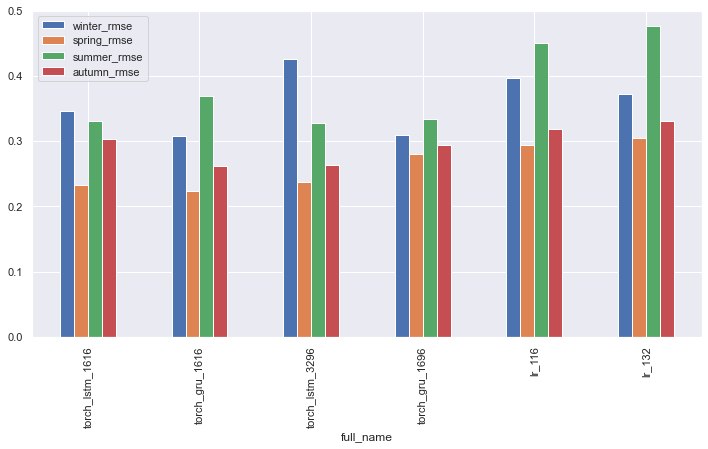

In [13]:
# df_s44_seasoned_no_sarimax.plot(kind='bar')

import seaborn as sns
sns.set()
df_s44_seasoned_no_sarimax.set_index('full_name').plot(
    kind='bar',
    figsize=(12,6),
    # stacked=True,
)

<AxesSubplot:xlabel='full_name'>

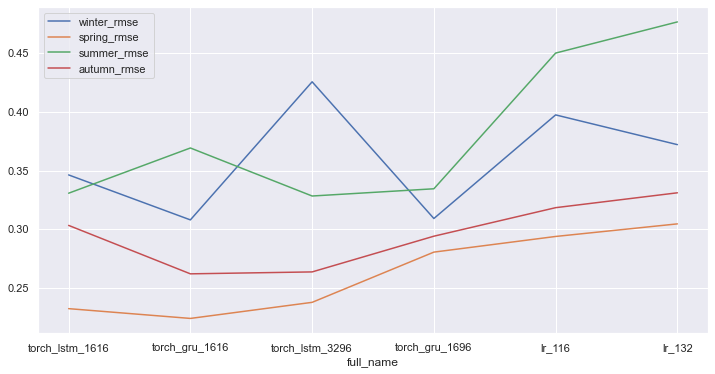

In [14]:
sns.set()
df_s44_seasoned_no_sarimax.set_index('full_name').plot(
    # kind='bar',
    figsize=(12,6),
    # stacked=True,
)

<AxesSubplot:>

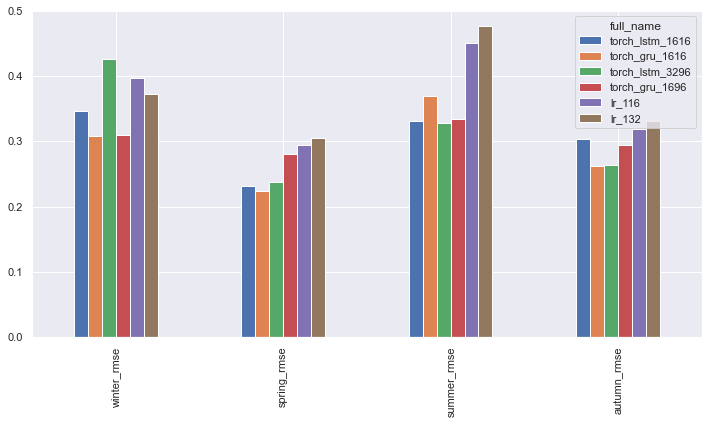

In [15]:
sns.set()
transposed = df_s44_seasoned_no_sarimax.set_index('full_name').transpose()
transposed.plot(
    kind='bar',
    figsize=(12,6),
    # yerr=[
        # [0.001] * 6,
        # [0.001] * 6,
        # [0.001] * 6,
        # [0.001] * 6,
        # ],
    # stacked=True,
)

In [16]:
diff_array[0, :]

array([0.15502124, 0.10979768, 0.14512069, 0.13156989])

In [17]:
import numpy as np
import matplotlib.pyplot as plt

sns.set()
sns.set_style("whitegrid")

In [18]:
sns.color_palette('Reds')

[(0.9950634371395617, 0.8596539792387543, 0.7986620530565167),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.6663437139561708, 0.06339100346020761, 0.08641291810841982)]

In [19]:
sns.color_palette('Greens')

[(0.8828143021914648, 0.9546943483275664, 0.8621914648212226),
 (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453)]

In [20]:
sns.color_palette('Oranges')

[(0.9955709342560554, 0.8907958477508651, 0.7855132641291811),
 (0.9921568627450981, 0.7769934640522875, 0.5727028066128412),
 (0.9921568627450981, 0.6280507497116494, 0.34226835832372166),
 (0.9648442906574395, 0.47100346020761247, 0.14197616301422528),
 (0.8782929642445213, 0.31990772779700116, 0.024405997693194924),
 (0.6768627450980392, 0.22089965397923875, 0.010749711649365626)]

torch_lstm_1616 __ LSTM (h=16, m=16)
torch_gru_1616 __ LSTM (h=32, m=96)
torch_lstm_3296 __ GRU (h=16, m=16)
torch_gru_1696 __ GRU (h=16, m=96)
lr_116 __ LR (m=16)
lr_132 __ LR (m=32)


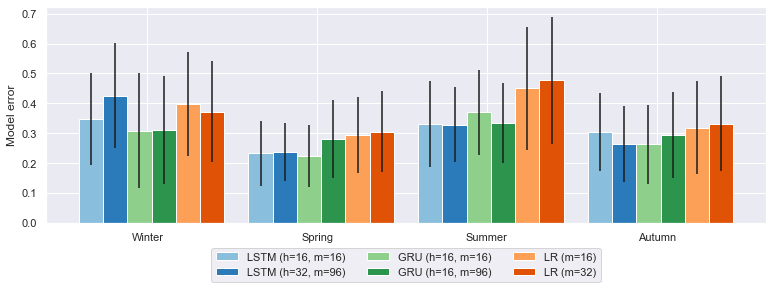

In [32]:
base_color_idx = 2
base_color_step = 2

base_colors = [
    sns.color_palette('Blues')[base_color_idx],
    sns.color_palette('Blues')[base_color_idx + base_color_step],
    sns.color_palette('Greens')[base_color_idx],
    sns.color_palette('Greens')[base_color_idx + base_color_step],
    sns.color_palette('Oranges')[base_color_idx],
    sns.color_palette('Oranges')[base_color_idx + base_color_step],
]

df_for_plot = df_s44_seasoned_no_sarimax.set_index('full_name')
data = [
    rmse_array[0,:],
    rmse_array[2,:],
    rmse_array[1,:],
    rmse_array[3,:],
    rmse_array[4,:],
    rmse_array[5,:],
]

fig, ax = plt.subplots(figsize=(10, 3))
ax = fig.add_axes([0,0,1,1])

selected_total_width_coef = 1.75
selected_col_width = 0.25
diff_enabled = True

X = np.arange(4) * selected_total_width_coef

for idx in range(6):
   ax.bar(X + selected_col_width * idx, data[idx],
          width = selected_col_width,
          yerr=diff_array[idx, :] if diff_enabled else [0]*4,
          color=base_colors[idx])

xticks = [(i * selected_total_width_coef + selected_total_width_coef / 3.) for i in range(4)]

plt.xticks(ticks=xticks, labels=['Winter', 'Spring', 'Summer', 'Autumn'])

# df_s44_seasoned_no_sarimax.set_index('full_name').index
default_legend = df_s44_seasoned_no_sarimax.set_index('full_name').index
# TODO: fix legend and data order
custom_legend = [
    'LSTM (h=16, m=16)',
    'LSTM (h=32, m=96)',
    'GRU (h=16, m=16)',
    'GRU (h=16, m=96)',
    'LR (m=16)',
    'LR (m=32)',
]

# plt.ylim(-0.01, 0.9)

for l1, l2 in zip(default_legend, custom_legend):
    print(f"{l1} __ {l2}")

ax.legend(
    custom_legend,
    ncol=3,
    # loc='upper center'
    loc="lower center", bbox_to_anchor=(0.5, -0.3)
)

fig.subplots_adjust(bottom=0.25)

plt.ylabel('Model error')
plt.savefig('/Users/jonasb/repos/heat-pump-first-paper/diagram_nbs/output/seasonal_diagram.pdf', bbox_inches = "tight")
# ax.bar(X + selected_col_width * 0, data[0], color = 'b', width = selected_col_width, yerr=diff_array[0, :])
# ax.bar(X + selected_col_width * 1, data[1], color = 'g', width = selected_col_width, yerr=diff_array[1, :])
# ax.bar(X + selected_col_width * 2, data[2], color = 'r', width = selected_col_width, yerr=diff_array[2, :])
# ax.bar(X + selected_col_width * 3, data[3], color = 'y', width = selected_col_width, yerr=diff_array[3, :])
# ax.bar(X + selected_col_width * 4, data[4], color = 'b', width = selected_col_width, yerr=diff_array[4, :])
# ax.bar(X + selected_col_width * 5, data[5], color = 'g', width = selected_col_width, yerr=diff_array[5, :])

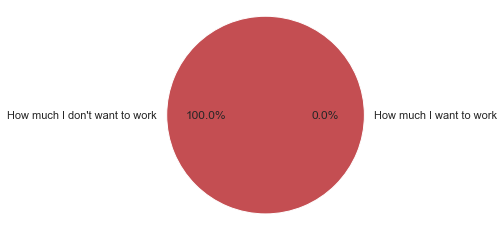

In [22]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['How much I want to work', "How much I don't want to work"]
sizes = [0, 100]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        colors=['b', 'r']
        )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [23]:
sns.color_palette()
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [24]:
sns.color_palette('Blues')

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

In [25]:
sns.color_palette('Reds')

[(0.9950634371395617, 0.8596539792387543, 0.7986620530565167),
 (0.9882352941176471, 0.6866743560169165, 0.5778854286812765),
 (0.9865897731641676, 0.5067281814686659, 0.38123798539023457),
 (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
 (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 (0.6663437139561708, 0.06339100346020761, 0.08641291810841982)]

In [26]:
sns.color_palette('Greens')

[(0.8828143021914648, 0.9546943483275664, 0.8621914648212226),
 (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453)]

In [27]:
sns.color_palette('Oranges')

[(0.9955709342560554, 0.8907958477508651, 0.7855132641291811),
 (0.9921568627450981, 0.7769934640522875, 0.5727028066128412),
 (0.9921568627450981, 0.6280507497116494, 0.34226835832372166),
 (0.9648442906574395, 0.47100346020761247, 0.14197616301422528),
 (0.8782929642445213, 0.31990772779700116, 0.024405997693194924),
 (0.6768627450980392, 0.22089965397923875, 0.010749711649365626)]

In [28]:
list(transposed.iloc[0].to_numpy())

[0.3462809987500001,
 0.30792160875,
 0.42572021125,
 0.30910257875,
 0.39748681125,
 0.37211941875]

In [29]:
import matplotlib.pyplot as plt

sns.set()
plt.close()

tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

<AxesSubplot:xlabel='day', ylabel='total_bill'>

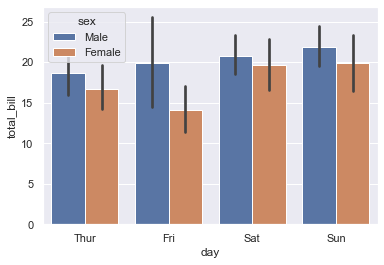

In [30]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
ax




<AxesSubplot:title={'center':'multiple stacked bar plot'}>

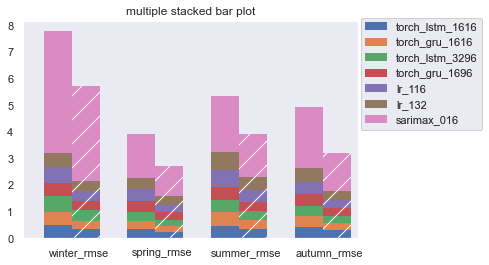

In [31]:
# -------------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_clustered_stacked(dfall: pd.DataFrame,
                           labels=None,
                           title="multiple stacked bar plot",  H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot.
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns)
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1])
    axe.add_artist(l1)
    return axe

plot_clustered_stacked([df_s44_seasoned.set_index('full_name').transpose(), df_s44_seasoned_rmse.set_index('full_name').transpose()])